In [22]:
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [12]:
dfList = []
for i in range(1,32):
    print(".",end='', flush=True)
    dfList.append(pd.read_json("./data/2017-01-{0:02d}.txt".format(i), lines=True))
print("done!")
df = pd.concat(dfList)

...............................done!


In [13]:
print(df.fraudLabel.value_counts())
df.head()

0    30117
1      883
Name: fraudLabel, dtype: int64


,basket,fraudLabel,totalAmount,transactionId,zipCode
0,"[5, 1, 1, 4, 2, 5, 5, 0, 5]",0,693,6543306520,8600
1,"[1, 4, 1, 0, 0, 5]",0,60,4690422808,1948
2,"[1, 1]",0,142,1686204649,8518
3,"[2, 0, 0, 4, 5, 2, 0, 2, 5, 1, 5]",0,286,9619883092,1204
4,[4],0,15,9770478572,6487


### Feature Engineering

In [14]:
df['c_0'] = df.basket.map(lambda x: x.count(0))
df['c_1'] = df.basket.map(lambda x: x.count(1))
df['c_2'] = df.basket.map(lambda x: x.count(2))
df['c_3'] = df.basket.map(lambda x: x.count(3))
df['c_4'] = df.basket.map(lambda x: x.count(4))
#df['c_5'] = df.basket.map(lambda x: x.count(5))

In [15]:
df.head()

,basket,fraudLabel,totalAmount,transactionId,zipCode,c_0,c_1,c_2,c_3,c_4
0,"[5, 1, 1, 4, 2, 5, 5, 0, 5]",0,693,6543306520,8600,1,2,1,0,1
1,"[1, 4, 1, 0, 0, 5]",0,60,4690422808,1948,2,2,0,0,1
2,"[1, 1]",0,142,1686204649,8518,0,2,0,0,0
3,"[2, 0, 0, 4, 5, 2, 0, 2, 5, 1, 5]",0,286,9619883092,1204,3,1,3,0,1
4,[4],0,15,9770478572,6487,0,0,0,0,1


In [16]:
df["zipCode"] = df["zipCode"].astype('category',categories=list(range(1000,10000)))
dummies = pd.get_dummies(df.zipCode)

In [17]:
dummies.shape

(31000, 9000)

In [18]:
df2 = pd.concat([df, dummies], axis=1)

In [19]:
df3 = df2.drop(["basket", "zipCode", "transactionId"], axis=1)

In [20]:
df3.head()

,fraudLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,1000,1001,1002,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,693,1,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,60,2,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,142,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,286,3,1,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,15,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=0)

### Imputation

#### Total Amount

In [38]:
train['totalAmount'].median()

186.0

In [40]:
train['totalAmount'].mean()

240.80451612903227

In [41]:
train['totalAmount'].median()

186.0

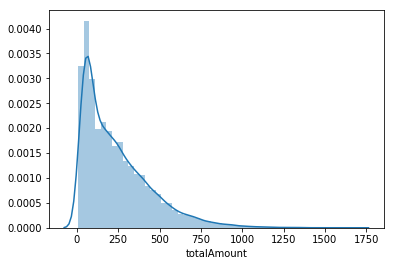

In [42]:
sns.distplot(train['totalAmount']);

Let's take a mix between mean and median: 210

#### ZIP Code

In [45]:
train.groupby('zipCode').count().sort_values('basket', ascending=False).head()

,basket,fraudLabel,totalAmount,transactionId,c_0,c_1,c_2,c_3,c_4
zipCode,,,,,,,,,
5567,9,9,9,9,9,9,9,9,9
6760,9,9,9,9,9,9,9,9,9
1086,9,9,9,9,9,9,9,9,9
5786,9,9,9,9,9,9,9,9,9
6852,9,9,9,9,9,9,9,9,9


Let's take the most prevalent zip code: 5567

#### Basket

In [54]:
train['basket_sum'] = train['c_0'] + train['c_1'] + train['c_2'] + train['c_3'] + train['c_4']

In [55]:
train.head()

,basket,fraudLabel,totalAmount,transactionId,zipCode,c_0,c_1,c_2,c_3,c_4,basket_sum
281,"[4, 4, 3, 4, 3]",1,430,2105981900,5592,0,0,0,2,3,5
57,"[5, 5, 4, 0, 0, 5]",0,246,3465974417,3163,2,0,0,0,1,3
273,"[4, 2, 4, 5, 4, 3, 3, 5, 0, 1, 1, 2, 2]",0,1365,2396669798,9578,1,2,3,2,3,11
725,[3],0,52,5227549496,7146,0,0,0,1,0,1
55,"[3, 0, 5]",0,60,7814666327,1027,1,0,0,1,0,2


In [56]:
train['basket_sum'].mean()

3.932119815668203

In [58]:
train['c_0'].median()

1.0

In [59]:
train['c_1'].median()

1.0

In [60]:
train['c_2'].median()

1.0

In [61]:
train['c_3'].median()

1.0

In [62]:
train['c_4'].median()

1.0

Let's impute 1 for all items in case the basket is missing.

#### Test if we can read the imputed values:

In [93]:
imputed_values = pd.read_json('imputed_values.json', typ='series')

In [94]:
imputed_values = pd.DataFrame(imputed_values).transpose()

In [87]:
imputed_values.loc[0,'basket']

[0, 1, 2, 3, 4]